# This example was taken from DataCamp

### Modules

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
sns.set()

### Importing data

In [65]:
file_path = '../../datasets/gm_2008_region.csv'

In [66]:
df = pd.read_csv(file_path)

In [67]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


### Building training and taget data

In [68]:
X = df['fertility']
y = df['life']

In [69]:
X.shape, y.shape

((139,), (139,))

In [91]:
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [71]:
X.shape, y.shape

((139, 1), (139, 1))

### Exploring correlation data

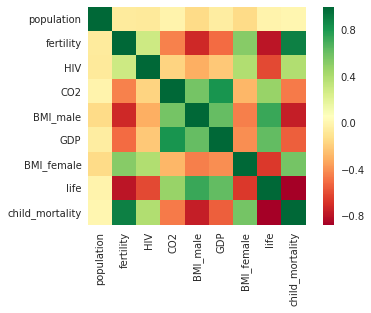

In [72]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

* As we see life and fertility are negatively correlated:
     * This means that we have a 0.8 of correlation but a negative trend

### scatter plot fertility vs life

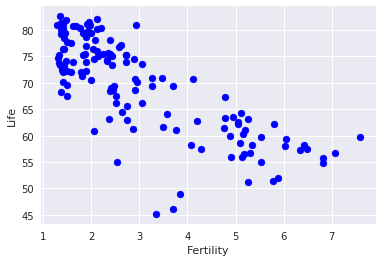

In [73]:
plt.scatter(X, y, color='blue')
plt.xlabel('Fertility')
plt.ylabel('Life')
plt.show()

### Linear Regression

In [74]:
reg = LinearRegression()

In [75]:
# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1, 1)

In [76]:
prediction_space

array([[ 1.28      ],
       [ 1.40877551],
       [ 1.53755102],
       [ 1.66632653],
       [ 1.79510204],
       [ 1.92387755],
       [ 2.05265306],
       [ 2.18142857],
       [ 2.31020408],
       [ 2.43897959],
       [ 2.5677551 ],
       [ 2.69653061],
       [ 2.82530612],
       [ 2.95408163],
       [ 3.08285714],
       [ 3.21163265],
       [ 3.34040816],
       [ 3.46918367],
       [ 3.59795918],
       [ 3.72673469],
       [ 3.8555102 ],
       [ 3.98428571],
       [ 4.11306122],
       [ 4.24183673],
       [ 4.37061224],
       [ 4.49938776],
       [ 4.62816327],
       [ 4.75693878],
       [ 4.88571429],
       [ 5.0144898 ],
       [ 5.14326531],
       [ 5.27204082],
       [ 5.40081633],
       [ 5.52959184],
       [ 5.65836735],
       [ 5.78714286],
       [ 5.91591837],
       [ 6.04469388],
       [ 6.17346939],
       [ 6.3022449 ],
       [ 6.43102041],
       [ 6.55979592],
       [ 6.68857143],
       [ 6.81734694],
       [ 6.94612245],
       [ 7

In [77]:
len(X), len(prediction_space)

(139, 50)

In [78]:
# Fit the model to the data
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

In [80]:
# Print R^2 
print(reg.score(X, y))

0.619244216774


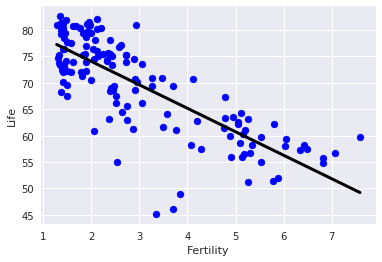

In [81]:
# Plot regression line
plt.scatter(X, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.xlabel('Fertility')
plt.ylabel('Life')
plt.show()

### Train/test split for regression, including all features 

In [92]:
X_all = df.drop(['life', 'Region'], axis=1).values

In [93]:
X_all

array([[  3.48110590e+07,   2.73000000e+00,   1.00000000e-01, ...,
          1.23140000e+04,   1.29904900e+02,   2.95000000e+01],
       [  1.98422510e+07,   6.43000000e+00,   2.00000000e+00, ...,
          7.10300000e+03,   1.30124700e+02,   1.92000000e+02],
       [  4.03818600e+07,   2.24000000e+00,   5.00000000e-01, ...,
          1.46460000e+04,   1.18891500e+02,   1.54000000e+01],
       ..., 
       [  8.65893420e+07,   1.86000000e+00,   4.00000000e-01, ...,
          4.08500000e+03,   1.21936700e+02,   2.62000000e+01],
       [  1.31145790e+07,   5.88000000e+00,   1.36000000e+01, ...,
          3.03900000e+03,   1.32449300e+02,   9.49000000e+01],
       [  1.34954620e+07,   3.85000000e+00,   1.51000000e+01, ...,
          1.28600000e+03,   1.31974500e+02,   9.83000000e+01]])

In [94]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.3, random_state=42)

In [95]:
# Create the regressor: reg_all
reg_all = LinearRegression()

In [96]:
# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# R²

In [98]:
print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.8380468731430059


# RMSE

In [99]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.247601080037023


### 5-fold cross-validation

In [101]:
from sklearn.model_selection import cross_val_score

In [102]:
# Create a linear regression object: reg
reg = LinearRegression()

In [106]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X_all, y, cv=5)

In [107]:
# Print the 5-fold cross-validation scores
print(cv_scores)

[ 0.81720569  0.82917058  0.90214134  0.80633989  0.94495637]


In [108]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.8599627722793761


Now that we have cross-validated our model, we can more confidently evaluate its predictions.

### Exercise K-Fold CV comparison

In [111]:
cvscores_3 = cross_val_score(reg, X_all, y, cv=3)

In [112]:
print(np.mean(cvscores_3))

0.871871278262


In [114]:
cvscores_10 = cross_val_score(reg, X_all, y, cv=10)
print(np.mean(cvscores_10))

0.843612862013


In [115]:
%timeit cross_val_score(reg, X, y, cv = 3)

4.77 ms ± 250 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [116]:
%timeit cross_val_score(reg, X, y, cv = 10)

14.3 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Regularization I: Lasso

In [117]:
from sklearn.linear_model import Lasso

In [137]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

In [138]:
# Fit the regressor to the data
lasso.fit(X_all, y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [139]:
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.         -0.
 -0.07087587]


In [140]:
df_columns = df.columns.drop(['life', 'Region'])

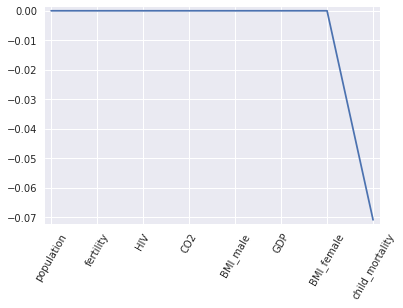

In [141]:
# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

 According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

### Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

In [156]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [157]:
from sklearn.linear_model import Ridge

In [158]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [159]:
alpha_space

array([  1.00000000e-04,   1.20679264e-04,   1.45634848e-04,
         1.75751062e-04,   2.12095089e-04,   2.55954792e-04,
         3.08884360e-04,   3.72759372e-04,   4.49843267e-04,
         5.42867544e-04,   6.55128557e-04,   7.90604321e-04,
         9.54095476e-04,   1.15139540e-03,   1.38949549e-03,
         1.67683294e-03,   2.02358965e-03,   2.44205309e-03,
         2.94705170e-03,   3.55648031e-03,   4.29193426e-03,
         5.17947468e-03,   6.25055193e-03,   7.54312006e-03,
         9.10298178e-03,   1.09854114e-02,   1.32571137e-02,
         1.59985872e-02,   1.93069773e-02,   2.32995181e-02,
         2.81176870e-02,   3.39322177e-02,   4.09491506e-02,
         4.94171336e-02,   5.96362332e-02,   7.19685673e-02,
         8.68511374e-02,   1.04811313e-01,   1.26485522e-01,
         1.52641797e-01,   1.84206997e-01,   2.22299648e-01,
         2.68269580e-01,   3.23745754e-01,   3.90693994e-01,
         4.71486636e-01,   5.68986603e-01,   6.86648845e-01,
         8.28642773e-01,

In [160]:
# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

In [161]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

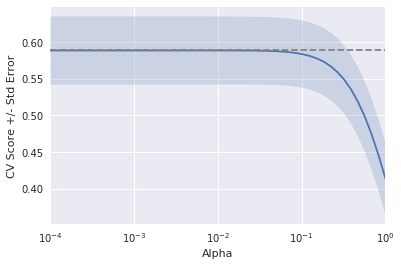

In [163]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)